## DATA 512 FALL 2019 - ASSIGNMENT 1 - DATA CURATION

This notebook is part of assignment 1 of the class Human Centered Data Science (DATA 512) at The University of Washington. Assignment requirements can be found here: https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)/Assignments#A1:_Data_curation

"The purpose of the assignment is to demonstrate that you can follow best practices for open scientific research in designing and implementing your project, and make your project fully reproducible by others: from data collection to data analysis." - Jonathan Morgan (JMO), DATA 512 (FALL 2019): A1

In [1]:
import sys
print(sys.version)

3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


This notebook uses Python version 3.7.1

### DATA ACQUISITION

The section below contains copied code from the example provided here: http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

In [2]:
#importing libraries
import json
import requests
import pandas as pd

In [3]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'


In [4]:
# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

# Customize these with your own information
# 
headers = {
    'User-Agent': 'https://github.com/ThomasWinegarden',
    'From': 'thomasw3@uw.edu'
}

In [5]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [6]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [7]:
#print(example_monthly_pageviews)

"For each API, you will need to collect data for all months where data is available and then save the raw results into 5 separate JSON source data files (one file per API query type) before continuing to step 2" -JMO

In [8]:

#apiname_accesstype_firstmonth-lastmonth.json
#pagecounts_desktop-site_200712-201908.json



EXAMPLE CELL BELOW IS FROM THIS WEBSITE: https://stackabuse.com/saving-text-json-and-csv-to-a-file-in-python/

In [9]:
#import json
#
#my_details = {
#    'name': 'John Doe',
#    'age': 29
#}
#
#with open('personal.json', 'w') as json_file:
#    json.dump(my_details, json_file)

In [10]:
#def api_call_and_json_saver(endpoint, parameters, targetfilename):
#    call = requests.get(endpoint.format(**parameters), headers=headers)
#    response = call.json()
#    return response

(1) desktop, (2) mobile    From: Legacy Pagecounts API: December 2007 through July 2016

In [11]:
#desktop legacy
desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }



In [12]:
desktop_legacy_dict = api_call(endpoint_legacy, desktop_params_legacy)
with open('pagecounts_desktop-site_200101-201810.json', 'w') as json_out_file1:
    json.dump(desktop_legacy_dict, json_out_file1)

In [13]:
#mobile legacy
mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

In [14]:
mobile_legacy_dict = api_call(endpoint_legacy, mobile_params_legacy)
with open('pagecounts_mobile-site_200101-201810.json', 'w') as json_out_file2:
    json.dump(mobile_legacy_dict, json_out_file2)

(3) desktop, (4) mobile web, (5) mobile app    From: Pageviews API: July 2015 through last month

In [15]:
#desktop pageviews
desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019100100'
                        }


In [16]:
#desktop_pageviews_dict = api_call(endpoint_pageviews, desktop_params_pageviews)
#print(example_monthly_pageviews)

In [17]:
desktop_pageviews_dict = api_call(endpoint_pageviews, desktop_params_pageviews)
with open('pageviews_desktop_201507-201910.json', 'w') as json_out_file3:
    json.dump(desktop_pageviews_dict, json_out_file3)

In [18]:
#mobile-web pageviews
mobile_web_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019100100'
                        }


In [19]:
mobile_web_pageviews_dict = api_call(endpoint_pageviews, mobile_web_params_pageviews)
with open('pageviews_mobile-web_201507-201910.json', 'w') as json_out_file4:
    json.dump(mobile_web_pageviews_dict, json_out_file4)

In [20]:
#mobile-app pageviews
mobile_app_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2019100100'
                        }


In [21]:
mobile_app_pageviews_dict = api_call(endpoint_pageviews, mobile_app_params_pageviews)
with open('pageviews_mobile-app_201507-201910.json', 'w') as json_out_file5:
    json.dump(mobile_app_pageviews_dict, json_out_file5)

In [22]:
type(mobile_app_pageviews_dict)

dict

desktop_legacy_dict
mobile_legacy_dict
desktop_pageviews_dict
mobile_web_pageviews_dict
mobile_app_pageviews_dict

### 2. DATA PROCESSING

"For data collected from the Pageviews API, combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month." - JMO

"For all data, separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour (DDHH)."

In [57]:
#from https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)/Assignments#A1:_Data_curation
from IPython.core.display import display, HTML
display(HTML('<table class="wikitable"><tbody><tr><th>Column</th><th>Value</th></tr><tr><td>year</td><td>YYYY</td></tr><tr><td>month</td><td>MM</td></tr><tr><td>pagecount_all_views</td><td>num_views</td></tr><tr><td>pagecount_desktop_views</td><td>num_views</td></tr><tr><td>pagecount_mobile_views</td><td>num_views</td></tr><tr><td>pageview_all_views</td><td>num_views</td></tr><tr><td>pageview_desktop_views</td><td>num_views</td></tr><tr><td>pageview_mobile_views</td><td>num_views</td></tr></tbody></table>'))

Column,Value
year,YYYY
month,MM
pagecount_all_views,num_views
pagecount_desktop_views,num_views
pagecount_mobile_views,num_views
pageview_all_views,num_views
pageview_desktop_views,num_views
pageview_mobile_views,num_views


desktop_legacy_dict
mobile_legacy_dict
desktop_pageviews_dict
mobile_web_pageviews_dict
mobile_app_pageviews_dict

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.json.json_normalize.html

In [23]:
from pandas.io.json import json_normalize
json_normalize(desktop_legacy_dict['items'])

,access-site,count,granularity,project,timestamp
0,desktop-site,2998331524,monthly,en.wikipedia,2007120100
1,desktop-site,4930902570,monthly,en.wikipedia,2008010100
2,desktop-site,4818393763,monthly,en.wikipedia,2008020100
3,desktop-site,4955405809,monthly,en.wikipedia,2008030100
4,desktop-site,5159162183,monthly,en.wikipedia,2008040100
5,desktop-site,5584691092,monthly,en.wikipedia,2008050100
6,desktop-site,5712104279,monthly,en.wikipedia,2008060100
7,desktop-site,5306302874,monthly,en.wikipedia,2008070100
8,desktop-site,5140155519,monthly,en.wikipedia,2008080100
9,desktop-site,5479533823,monthly,en.wikipedia,2008090100


In [71]:
desktop_legacy_fix = json_normalize(desktop_legacy_dict['items'])
desktop_legacy_fix = desktop_legacy_fix.rename(columns={'count' : 'pagecount_desktop_views'})
mobile_legacy_fix = json_normalize(mobile_legacy_dict['items'])
mobile_legacy_fix = mobile_legacy_fix.rename(columns={'count' : 'pagecount_mobile_views'})
#desktop_legacy_fix

desktop_pageviews_fix = json_normalize(desktop_pageviews_dict['items'])
desktop_pageviews_fix = desktop_pageviews_fix.rename(columns={'views' : 'pageview_desktop_views'})
mobile_web_pageviews_fix = json_normalize(mobile_web_pageviews_dict['items'])
mobile_web_pageviews_fix = mobile_web_pageviews_fix.rename(columns={'views' : 'temp_pageviews_mobile_web_views'})
mobile_app_pageviews_fix = json_normalize(mobile_app_pageviews_dict['items'])
mobile_app_pageviews_fix = mobile_app_pageviews_fix.rename(columns={'views' : 'temp_pageviews_mobile_app_views'})


In [72]:
mobile_legacy_fix.head()

,access-site,pagecount_mobile_views,granularity,project,timestamp
0,mobile-site,3091546685,monthly,en.wikipedia,2014100100
1,mobile-site,3027489668,monthly,en.wikipedia,2014110100
2,mobile-site,3278950021,monthly,en.wikipedia,2014120100
3,mobile-site,3485302091,monthly,en.wikipedia,2015010100
4,mobile-site,3091534479,monthly,en.wikipedia,2015020100


In [73]:
desktop_legacy_fix = desktop_legacy_fix.drop(columns=["project", "granularity", "access-site"])
mobile_legacy_fix = mobile_legacy_fix.drop(columns=["project", "granularity", "access-site"])
desktop_pageviews_fix = desktop_pageviews_fix.drop(columns=["project", "granularity", "agent", "access"])
mobile_web_pageviews_fix = mobile_web_pageviews_fix.drop(columns=["project", "granularity", "agent", "access"])
mobile_app_pageviews_fix = mobile_app_pageviews_fix.drop(columns=["project", "granularity", "agent", "access"])

In [74]:
mobile_legacy_fix.head()

,pagecount_mobile_views,timestamp
0,3091546685,2014100100
1,3027489668,2014110100
2,3278950021,2014120100
3,3485302091,2015010100
4,3091534479,2015020100


In [76]:
merged_DF = pd.merge(desktop_legacy_fix, mobile_legacy_fix, on='timestamp', how='outer')
merged_DF.head()
merged_DF = pd.merge(merged_DF, desktop_pageviews_fix, on='timestamp', how='outer')
merged_DF.head()
merged_DF = pd.merge(merged_DF, mobile_web_pageviews_fix, on='timestamp', how='outer')
merged_DF.head()
merged_DF = pd.merge(merged_DF, mobile_app_pageviews_fix, on='timestamp', how='outer')
merged_DF.head()

,pagecount_desktop_views,timestamp,pagecount_mobile_views,pageview_desktop_views,temp_pageviews_mobile_web_views,temp_pageviews_mobile_app_views
0,2.998332e+09,2007120100,NaN,NaN,NaN,NaN
1,4.930903e+09,2008010100,NaN,NaN,NaN,NaN
2,4.818394e+09,2008020100,NaN,NaN,NaN,NaN
3,4.955406e+09,2008030100,NaN,NaN,NaN,NaN
4,5.159162e+09,2008040100,NaN,NaN,NaN,NaN


In [78]:
#setting year and month columns
final_DF = pd.DataFrame()
final_DF['year'] = merged_DF['timestamp'].str.slice(0, 4) #first 4 of timestamp string is year
final_DF['month'] = merged_DF['timestamp'].str.slice(4, 6) #5th and 6th character of string are month
#first views_x is desktop legacy fix
#first views_y (3rd column) is  mobile_legacy_fix
#second views_x (4th column) is desktop_pageviews_fix
#second views_y (5th column) is mobile_web_pageviews_fix
#last views (6th column) is mobile_app_pageviews_fix
final_DF['pagecount_desktop_views'] = merged_DF['pagecount_desktop_views']
final_DF['pagecount_mobile_views'] = merged_DF['pagecount_mobile_views']
final_DF['pageview_desktop_views'] = merged_DF['pageview_desktop_views']
final_DF['pageview_mobile_views'] = merged_DF['temp_pageviews_mobile_web_views'] + merged_DF['temp_pageviews_mobile_app_views']
                                                                                             
                                                                                             

In [79]:
final_DF.head()
#now need the "all" columns

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2.998332e+09,NaN,NaN,NaN
1,2008,01,4.930903e+09,NaN,NaN,NaN
2,2008,02,4.818394e+09,NaN,NaN,NaN
3,2008,03,4.955406e+09,NaN,NaN,NaN
4,2008,04,5.159162e+09,NaN,NaN,NaN


In [80]:
final_DF['pagecount_all_views'] = final_DF['pagecount_desktop_views'] + final_DF['pagecount_mobile_views']
final_DF['pageview_all_views'] = final_DF['pageview_desktop_views'] + final_DF['pageview_mobile_views']

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [82]:
final_DF = final_DF.fillna(0)

In [83]:
final_DF.head()

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,pagecount_all_views,pageview_all_views
0,2007,12,2.998332e+09,0.0,0.0,0.0,0.0,0.0
1,2008,01,4.930903e+09,0.0,0.0,0.0,0.0,0.0
2,2008,02,4.818394e+09,0.0,0.0,0.0,0.0,0.0
3,2008,03,4.955406e+09,0.0,0.0,0.0,0.0,0.0
4,2008,04,5.159162e+09,0.0,0.0,0.0,0.0,0.0


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

https://datacarpentry.org/python-ecology-lesson/05-merging-data/


In [ ]:
#for i in pd.date_range('2001010100', '2008100100', freq='M'):

In [99]:
final_DF.to_csv('en-wikipedia_traffic_200801-201910.csv', index=False)

advice from classmates:

array of dicts

Iterate over below list, to get number of views

pandas look up json normalize to read unstructured json file

exclude views/counts that are zero. lib plt

### 3. DATA PROCESSING

"Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop)." -JMO

"In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph." - JMO

Goal is to reproduce this visualization:
https://wiki.communitydata.science/File:En-wikipedia_traffic_200801-201709_thompson.png

In [89]:
import matplotlib.pyplot as plt

In [92]:
plot_DF = final_DF.copy()
#giving first day of the month for new column 'day' in order to set datetime on date correctly.
#This still outputs monthly bucketed data.
plot_DF['day'] = '01'
plot_DF['date'] = plot_DF['year'] + plot_DF['month'] + plot_DF['day']
plot_DF['date'] = pd.to_datetime(plot_DF[['year','month','day']])

#re-replaces view counts of zero to NA
plot_DF[plot_DF==0] = float('nan')

plot_DF['pagecount_desktop_views'==0] = float('nan')
plot_DF['pagecount_mobile_views'==0] = float('nan')
plot_DF['pageview_desktop_views'==0] = float('nan')
plot_DF['pageview_mobile_views'==0] = float('nan')
plot_DF['pagecount_all_views'==0] = float('nan')
plot_DF['pageview_all_views'==0] = float('nan')

In [93]:
#adjust view counts to B
plot_DF['pagecount_desktop_views'] = plot_DF['pagecount_desktop_views'] / 1000000000
plot_DF['pagecount_mobile_views'] = plot_DF['pagecount_mobile_views'] / 1000000000
plot_DF['pageview_desktop_views'] = plot_DF['pageview_desktop_views'] / 1000000000
plot_DF['pageview_mobile_views'] = plot_DF['pageview_mobile_views'] / 1000000000
plot_DF['pagecount_all_views'] = plot_DF['pagecount_all_views'] / 1000000000
plot_DF['pageview_all_views'] = plot_DF['pageview_all_views'] / 1000000000


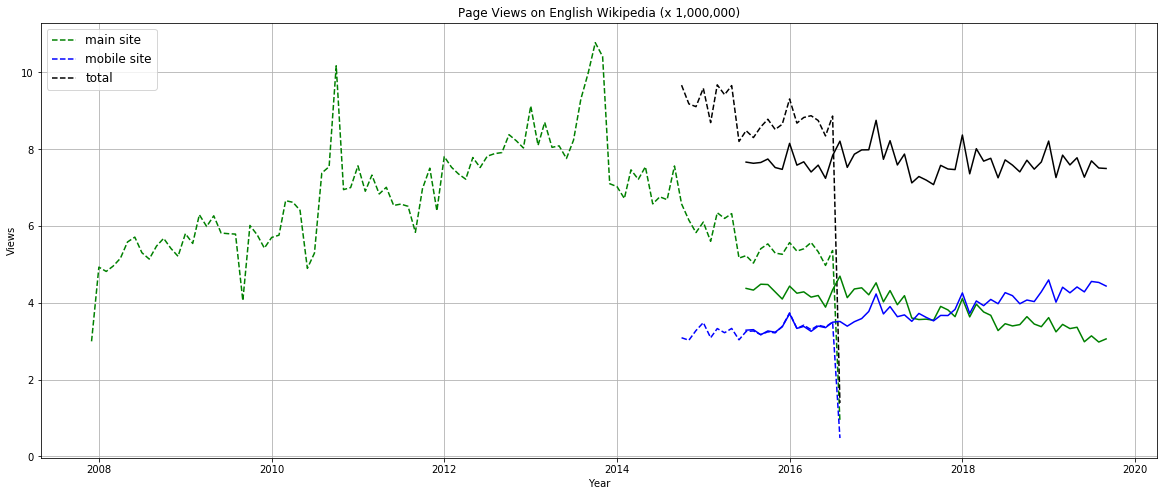

In [98]:
# Plot the time series of pagecount and pageview data by access type
plt.plot('date', 'pagecount_desktop_views', data=plot_DF, color='green', linestyle='dashed', 
         label='main site')

plt.plot('date', 'pagecount_mobile_views', data=plot_DF, color='blue', linestyle='dashed', 
         label='mobile site')

plt.plot('date', 'pagecount_all_views', data=plot_DF, color='black', linestyle='dashed', 
         label='total')

plt.plot('date', 'pageview_desktop_views', data=plot_DF, color='green', 
         label='')

plt.plot('date', 'pageview_mobile_views', data=plot_DF, color='blue', 
         label='')

plt.plot('date', 'pageview_all_views', data=plot_DF, color='black', 
         label='')

plt.xlabel('Year')
plt.ylabel('Views')
plt.title('Page Views on English Wikipedia (x 1,000,000)')
plt.legend(loc='upper left', ncol = 1, prop={'size': 12})
plt.grid()
plt.axhline(y=0, color='k', linewidth = 0)

fig = plt.gcf()
fig.set_size_inches(20, 8)
fig.savefig('../testviz.jpeg', dpi = 600, bbox_inches='tight')
plt.show()

The dotted lines above represent the prior method of view counting provided by wikipedia's API while the solid lines represent the new method of view counting. The new method does not include scraper/web crawlers which is why you see a drop between the green dashed line and the new solid green line.

### 4. Documentation

Below is from the assignment spec found here: 

"Follow best practices for documenting your project, as outlined in the lecture slides and in Chapter 2 "Assessing Reproducibility" and Chapter 3 "The Basic Reproducible Workflow Template" from The Practice of Reproducible Research.

Your documentation will be done in your Jupyter Notebook, a README file, and a LICENSE file.

At minimum, your Jupyter Notebook should:

Provide a short, clear description of every step in the acquisition, processing, and analysis of your data in full Markdown sentences (not just inline comments or docstrings)
At minimum, you README file should
Describe the goal of the project.
List the license of the source data and a link to the Wikimedia Foundation REST API terms of use: https://www.mediawiki.org/wiki/REST_API#Terms_and_conditions
Link to all relevant API documentation
Describe the values of all fields in your final data file.
List any known issues or special considerations with the data that would be useful for another researcher to know. For example, you should describe that data from the Pageview API excludes spiders/crawlers, while data from the Pagecounts API does not." - JMO